<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/perceptron_iris_scilkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# implement a perceptron to classifiy iris using Scikit-Learn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


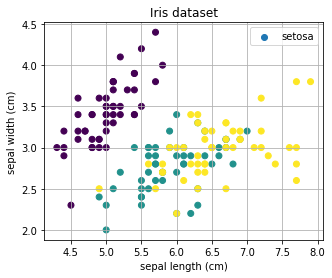

In [ ]:
iris = datasets.load_iris()
print(iris.target)
print(iris.target_names)
  
plt.figure(figsize=(5,4))
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target, label=iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc='upper right')
plt.title('Iris dataset')
plt.grid()
plt.show()

In [ ]:
# use 2 input features to easily display in 2D, use first two output features (classes) for the problem to be binary 
x = iris.data[0:100,[2,3]]     # petal length and petal width
y = iris.target[0:100]

labels = ['setosa', 'versicolor', 'virginica']
print('Class labels:', np.unique(y))
print(x[0:5,:])

# standarization 
sc = StandardScaler()
sc.fit(x)   # to estimate mean and standard deviation
xstd = sc.transform(x) 
x = xstd
print(x[0:5,:])

Class labels: [0 1]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[[-1.01297765 -1.04211089]
 [-1.01297765 -1.04211089]
 [-1.08231219 -1.04211089]
 [-0.94364311 -1.04211089]
 [-1.01297765 -1.04211089]]


In [ ]:
# import a model
#!pip install ....
model = Perceptron(max_iter=100, eta0=0.01, random_state=1)
model.fit(x, y)
y_pred=model.predict(x)

print(model.coef_, model.intercept_)

pred_error = np.mean((y-y_pred)**2)
print(pred_error)

[[0.01664029 0.00711338]] [0.]
0.0


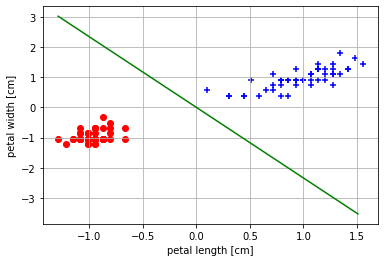

In [ ]:
#plot decision line
plt.scatter(x[y==0,0],x[y==0,1], color='red', marker='o',label=labels[0])
plt.scatter(x[y==1,0],x[y==1,1], color='blue', marker='+',label=labels[1])

xx = np.arange(x[:,0].min(),x[:,0].max(),0.1)
yy = -model.coef_[0,0]/model.coef_[0,1] * xx - model.intercept_/model.coef_[0,1]
plt.plot(xx,yy,'g-')
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.grid()
plt.show()

In [ ]:
# Another way for plotting the decision line/region
def plot_decision_region(x, y):
  x1 = np.arange(x[:,0].min()-1, x[:,0].max()+1,0.1)
  x2 = np.arange(x[:,1].min()-1,x[:,1].max()+1, 0.1) 

  xg1, xg2 = np.meshgrid(x1, x2)

  #print(xg2.flatten().T) # ravel()/flatten() returns a flattened one-dimensional array
  z = model.predict(np.array([xg1.ravel(), xg2.ravel()]).T)

  plt.contourf(xg1, xg2, z.reshape(xg1.shape))

  #plot the scatter plot of the dataset
  plt.scatter(x[y==0,0],x[y==0,1],color='yellow', marker='o' )
  plt.scatter(x[y==1,0],x[y==1,1],color='black', marker='d')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

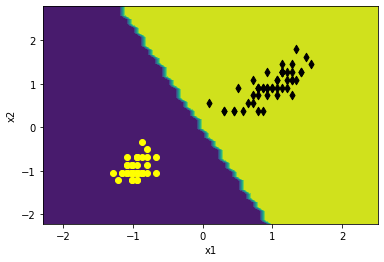

In [ ]:
plot_decision_region(x,y)

In [ ]:
# split the dataset into training and testing sets using (train_test_split) function (hold-out validation)
# this function shuffels the training sets internally before splitting
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)
print(ytest)
print('proportion of class labels in train and test sets:\n',np.bincount(ytrain), np.bincount(ytest))

#stratify: to have the same proportional of class labels in both training and testing sets (balanced sets)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print('proportion of class labels in train and test sets:\n',np.bincount(ytrain), np.bincount(ytest))


[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0]
proportion of class labels in train and test sets:
 [36 34] [14 16]
proportion of class labels in train and test sets:
 [35 35] [15 15]


In [ ]:
# train and test using hold out validation
model = Perceptron(max_iter=10, verbose=1, eta0=0.01, validation_fraction=0.1, random_state=42)
model.fit(xtrain, ytrain)
print(model.coef_, model.intercept_)

train_error = np.mean((ytrain-model.predict(xtrain))**2)
print(train_error)

test_error = np.mean((ytest-model.predict(xtest))**2)
print(test_error)

-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 70, Avg. loss: 0.000027
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 140, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 280, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 350, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 420, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
[[0.0152536  0.01244842]] [0.]
0.0
0.0


<bound method LinearClassifierMixin.decision_function of Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=1, warm_start=False)>

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score
model = Perceptron(max_iter=100, verbose=0, eta0=0.01, validation_fraction=0.1, random_state=42)
scores = cross_val_score(model, x, y, cv=5)
print('accuracies: ', scores)
print("%0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# then train a new model using x and y
model.fit(x,y)
print(model.coef_, model.intercept_)


accuracies:  [1. 1. 1. 1. 1.]
1.00 mean accuracy with a standard deviation of 0.00
[[0.01664029 0.01244842]] [0.]
